In [2]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [13]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
# File path to the lending_data.csv
file_path = Path("lending_data.csv")

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to review its contents
df.head()


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [14]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df['loan_status']

# Separate the X variable, the features
X = df.drop(columns=['loan_status'])


In [15]:
# Review the y variable Series
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
77531    1
77532    1
77533    1
77534    1
77535    1
Name: loan_status, Length: 77536, dtype: int64


In [16]:
# Review the X variable DataFrame
print(X)

       loan_size  interest_rate  borrower_income  debt_to_income  \
0        10700.0          7.672            52800        0.431818   
1         8400.0          6.692            43600        0.311927   
2         9000.0          6.963            46100        0.349241   
3        10700.0          7.664            52700        0.430740   
4        10800.0          7.698            53000        0.433962   
...          ...            ...              ...             ...   
77531    19100.0         11.261            86600        0.653580   
77532    17700.0         10.662            80900        0.629172   
77533    17600.0         10.595            80300        0.626401   
77534    16300.0         10.068            75300        0.601594   
77535    15600.0          9.742            72300        0.585062   

       num_of_accounts  derogatory_marks  total_debt  
0                    5                 1       22800  
1                    3                 0       13600  
2                 

### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [17]:
# Check the balance of our target values
label_balance = y.value_counts()
print(label_balance)


0    75036
1     2500
Name: loan_status, dtype: int64


### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [18]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [19]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (62028, 7)
X_test shape: (15508, 7)
y_train shape: (62028,)
y_test shape: (15508,)


In [20]:
print("Training labels summary:")
print(y_train.value_counts())

print("\nTesting labels summary:")
print(y_test.value_counts())


Training labels summary:
0    60035
1     1993
Name: loan_status, dtype: int64

Testing labels summary:
0    15001
1      507
Name: loan_status, dtype: int64


---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [21]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=1)

# Fit the model using training data
logistic_regression_model.fit(X_train, y_train)


LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [22]:
# Make predictions using the testing data
y_pred = logistic_regression_model.predict(X_test)


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [24]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

# Print the balanced_accuracy score of the model
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy Score: {balanced_accuracy}")

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)



Accuracy Score: 0.9921975754449317
Balanced Accuracy Score: 0.9521352751368186
Confusion Matrix:
[[14926    75]
 [   46   461]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15001
           1       0.86      0.91      0.88       507

    accuracy                           0.99     15508
   macro avg       0.93      0.95      0.94     15508
weighted avg       0.99      0.99      0.99     15508



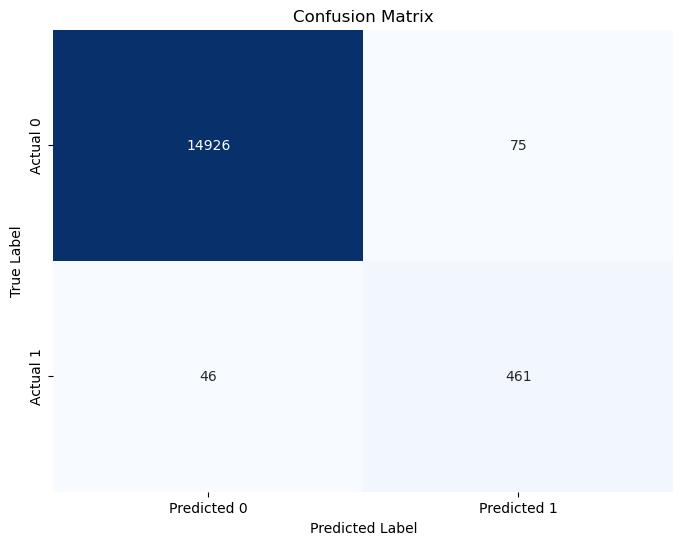

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [27]:
# Generate and print the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15001
           1       0.86      0.91      0.88       507

    accuracy                           0.99     15508
   macro avg       0.93      0.95      0.94     15508
weighted avg       0.99      0.99      0.99     15508



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The model's report reflects exceptional accuracy in predicting 'healthy' (0) loans, with all metrics close to 1.0. For 'high-risk' (1) loans, the model exhibits strong precision at 0.86, indicating mostly accurate predictions within the 'high-risk' category. The recall of 0.91 suggests the model's capability to identify most 'high-risk' loans among the actual 'high-risk' instances. Overall, the model demonstrates robust performance in distinguishing between 'healthy' and 'high-risk' loans, displaying high accuracy and balanced classification.

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [28]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [29]:
# Import the RandomOverSampler module from imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
random_oversampler = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_train_resampled, y_train_resampled = random_oversampler.fit_resample(X_train, y_train)


In [30]:
# Count the distinct values of the resampled labels data
resampled_label_counts = y_train_resampled.value_counts()
print(resampled_label_counts)


0    60035
1    60035
Name: loan_status, dtype: int64


### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [31]:
# Instantiate the Logistic Regression model
logistic_regression_model_resampled = LogisticRegression(random_state=1)

# Fit the model using the resampled training data
logistic_regression_model_resampled.fit(X_train_resampled, y_train_resampled)

# Make predictions using the testing data
y_pred_resampled = logistic_regression_model_resampled.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [32]:
# Print the balanced_accuracy score of the model
balanced_accuracy_resampled = balanced_accuracy_score(y_test, y_pred_resampled)
print(f"Balanced Accuracy Score (Resampled): {balanced_accuracy_resampled}")

Balanced Accuracy Score (Resampled): 0.9941749445500477


In [33]:
# Generate a confusion matrix
conf_matrix_resampled = confusion_matrix(y_test, y_pred_resampled)
print("Confusion Matrix (Resampled):")
print(conf_matrix_resampled)

Confusion Matrix (Resampled):
[[14915    86]
 [    3   504]]


In [34]:
# Print the classification report
classification_rep_resampled = classification_report(y_test, y_pred_resampled)
print("Classification Report (Resampled):")
print(classification_rep_resampled)

Classification Report (Resampled):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15001
           1       0.85      0.99      0.92       507

    accuracy                           0.99     15508
   macro avg       0.93      0.99      0.96     15508
weighted avg       1.00      0.99      0.99     15508



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The logistic regression model, trained with oversampled data, effectively predicts both 'healthy' (0) and 'high-risk' (1) loan labels. It displays near-perfect precision and high recall for 'healthy' loans, signifying accurate identification. For 'high-risk' loans, it exhibits solid precision and exceptional recall, demonstrating precise identification within the predicted 'high-risk' category and a strong ability to recognize most actual 'high-risk' instances. Overall, the model, trained with oversampled data, excels in distinguishing between loan categories, ensuring accurate predictions for both 'healthy' and 'high-risk' loans.